### Harvard GSD  J-Term 2121 
### Introduction to Data Science for Building Simulation
***
Instructor: Jung Min Han, jhan2@gsd.harvard.edu <br>
Date/Time: Jan 11-15/ 9:00 - 11:00 a.m. <br>
***

## Import packages

In [38]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Read file

In [71]:
Result = pd.read_csv('result/multizoneout.csv')
Result

,Date/Time,ZONE_PERI0:Zone Lights Electric Energy [J](Monthly),ZONE_PERI1:Zone Lights Electric Energy [J](Monthly),ZONE_PERI2:Zone Lights Electric Energy [J](Monthly),ZONE_PERI3:Zone Lights Electric Energy [J](Monthly),ZONE_CORE:Zone Lights Electric Energy [J](Monthly),ZONE_PERI0 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly),ZONE_PERI0 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Cooling Energy [J](Monthly),ZONE_PERI1 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly),ZONE_PERI1 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Cooling Energy [J](Monthly),ZONE_PERI2 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly),ZONE_PERI2 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Cooling Energy [J](Monthly),ZONE_PERI3 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly),ZONE_PERI3 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Cooling Energy [J](Monthly),ZONE_CORE IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly),ZONE_CORE IDEAL LOADS AIR:Zone Ideal Loads Zone Total Cooling Energy [J](Monthly)
0,January,2.882522e+08,562446255.5,464236718.6,2.900251e+08,1505433600,0.000044,2342572413,0.000031,2179011285,0.000203,9433246797,0.000039,2257534853,1.537224e+09,4.720000e-05
1,February,1.869031e+08,347760352.0,296057707.9,1.785919e+08,1368576000,0.000061,3146837995,0.000050,2946751822,0.000199,10098992860,0.000056,3146430098,9.720578e+08,6.083658e+00
2,March,1.620329e+08,272353500.3,258378449.5,1.400399e+08,1573862400,1011.257795,4990207861,1085.069270,4603178197,1606.017036,10596541063,828.568816,4564098936,5.085119e+08,2.413533e+00
3,April,8.409551e+07,148269682.2,147264435.5,8.722369e+07,1368576000,2716.874886,6087158535,2989.402122,6053301219,3595.120451,9767607820,2134.333916,5962626319,7.381962e+05,2.810000e-08
4,May,9.259360e+07,160021079.0,161012553.0,9.442220e+07,1573862400,1345.737606,7763998576,1324.625425,8445793698,1435.755381,10614868767,893.275207,7652282295,8.430000e-06,3.228674e+08
5,June,8.880083e+07,156003241.2,157203944.3,9.184060e+07,1505433600,0.000115,7828797524,0.000115,9377882883,0.000133,10583806726,0.000121,8433266909,2.330000e-05,1.016966e+09
6,July,8.389293e+07,144470645.1,145010798.8,8.508432e+07,1437004800,0.000124,9321820937,0.000129,10846648120,0.000158,12658774583,0.000131,9322655746,3.180000e-05,1.695022e+09
7,August,9.421761e+07,161683754.3,162150521.3,9.574912e+07,1573862400,0.000083,8610472605,0.000070,9957194565,0.000122,13519640595,0.000080,8614602204,2.620000e-05,1.514184e+09
8,September,9.637661e+07,165241889.1,158860104.7,9.489405e+07,1437004800,248.816110,7303244043,311.203386,7799777145,448.219976,13685550506,252.992210,7044574024,2.270000e-05,8.159826e+08
9,October,1.739372e+08,336222977.2,283812305.6,1.739299e+08,1505433600,3302.688920,5520050095,4590.683972,6094682803,5834.399504,13206155841,3130.632238,5314780704,4.030000e-06,1.538238e+08


In [73]:
## check all columes name
Result.columns.values

array(['Date/Time', 'ZONE_PERI0:Zone Lights Electric Energy [J](Monthly)',
       'ZONE_PERI1:Zone Lights Electric Energy [J](Monthly)',
       'ZONE_PERI2:Zone Lights Electric Energy [J](Monthly)',
       'ZONE_PERI3:Zone Lights Electric Energy [J](Monthly)',
       'ZONE_CORE:Zone Lights Electric Energy [J](Monthly)',
       'ZONE_PERI0 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly)',
       'ZONE_PERI0 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Cooling Energy [J](Monthly)',
       'ZONE_PERI1 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly)',
       'ZONE_PERI1 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Cooling Energy [J](Monthly)',
       'ZONE_PERI2 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly)',
       'ZONE_PERI2 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Cooling Energy [J](Monthly)',
       'ZONE_PERI3 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly)',
       'ZONE_PERI3 IDEAL LO

## Selecting columns

In [75]:
## Create colume list 
ColumnsList = pd.Series(Result.columns)
ColumnsList

0                                             Date/Time
1     ZONE_PERI0:Zone Lights Electric Energy [J](Mon...
2     ZONE_PERI1:Zone Lights Electric Energy [J](Mon...
3     ZONE_PERI2:Zone Lights Electric Energy [J](Mon...
4     ZONE_PERI3:Zone Lights Electric Energy [J](Mon...
5     ZONE_CORE:Zone Lights Electric Energy [J](Mont...
6     ZONE_PERI0 IDEAL LOADS AIR:Zone Ideal Loads Zo...
7     ZONE_PERI0 IDEAL LOADS AIR:Zone Ideal Loads Zo...
8     ZONE_PERI1 IDEAL LOADS AIR:Zone Ideal Loads Zo...
9     ZONE_PERI1 IDEAL LOADS AIR:Zone Ideal Loads Zo...
10    ZONE_PERI2 IDEAL LOADS AIR:Zone Ideal Loads Zo...
11    ZONE_PERI2 IDEAL LOADS AIR:Zone Ideal Loads Zo...
12    ZONE_PERI3 IDEAL LOADS AIR:Zone Ideal Loads Zo...
13    ZONE_PERI3 IDEAL LOADS AIR:Zone Ideal Loads Zo...
14    ZONE_CORE IDEAL LOADS AIR:Zone Ideal Loads Zon...
15    ZONE_CORE IDEAL LOADS AIR:Zone Ideal Loads Zon...
dtype: object

In [79]:
## Selecting your target colume list
ZoneLightingPointList = list(ColumnsList[(ColumnsList.str.endswith("Zone Lights Electric Energy [J](Monthly)"))])
ZoneLightingPointList

['ZONE_PERI0:Zone Lights Electric Energy [J](Monthly)',
 'ZONE_PERI1:Zone Lights Electric Energy [J](Monthly)',
 'ZONE_PERI2:Zone Lights Electric Energy [J](Monthly)',
 'ZONE_PERI3:Zone Lights Electric Energy [J](Monthly)',
 'ZONE_CORE:Zone Lights Electric Energy [J](Monthly)']

In [80]:
# CoreLightingElec = list(ColumnsList[(ColumnsList.str.endswith("Zone Lights Electric Energy [J](Monthly)"))&(ColumnsList.str.contains("CORE"))])
# PERI0LightingElec = list(ColumnsList[(ColumnsList.str.endswith("Zone Lights Electric Energy [J](Monthly)"))&(ColumnsList.str.contains("PERI0"))])
# PERI1LightingElec = list(ColumnsList[(ColumnsList.str.endswith("Zone Lights Electric Energy [J](Monthly)"))&(ColumnsList.str.contains("PERI1"))])
# PERI2LightingElec = list(ColumnsList[(ColumnsList.str.endswith("Zone Lights Electric Energy [J](Monthly)"))&(ColumnsList.str.contains("PERI2"))])
# PERI3LightingElec = list(ColumnsList[(ColumnsList.str.endswith("Zone Lights Electric Energy [J](Monthly)"))&(ColumnsList.str.contains("PERI3"))])
# CoreLightingElec

In [88]:
## Apply target lists to the dataframe
ZoneLighting = Result[ZoneLightingPointList]

## Multiply numerical values to modify your list 
ZoneLighting = ZoneLighting/3600000

ZoneLighting

,ZONE_PERI0:Zone Lights Electric Energy [J](Monthly),ZONE_PERI1:Zone Lights Electric Energy [J](Monthly),ZONE_PERI2:Zone Lights Electric Energy [J](Monthly),ZONE_PERI3:Zone Lights Electric Energy [J](Monthly),ZONE_CORE:Zone Lights Electric Energy [J](Monthly)
0,80.070060,156.235071,128.954644,80.562533,418.176
1,51.917522,96.600098,82.238252,49.608874,380.160
2,45.009151,75.653750,71.771792,38.899966,437.184
3,23.359863,41.186023,40.906788,24.228802,380.160
4,25.720444,44.450300,44.725709,26.228389,437.184
5,24.666898,43.334234,43.667762,25.511278,418.176
6,23.303591,40.130735,40.280777,23.634532,399.168
7,26.171559,44.912154,45.041811,26.596977,437.184
8,26.771282,45.900525,44.127807,26.359459,399.168
9,48.315885,93.395271,78.836752,48.313850,418.176


In [89]:
## Change your dataframe colume names
ZoneLighting = ZoneLighting.rename(columns={'ZONE_PERI0:Zone Lights Electric Energy [J](Monthly)': 'ZONE_PERI0','ZONE_PERI1:Zone Lights Electric Energy [J](Monthly)': 'ZONE_PERI1','ZONE_PERI2:Zone Lights Electric Energy [J](Monthly)': 'ZONE_PERI2','ZONE_PERI3:Zone Lights Electric Energy [J](Monthly)': 'ZONE_PERI3','ZONE_CORE:Zone Lights Electric Energy [J](Monthly)': 'ZONE_CORE' })

In [90]:
## Set index
ZoneLighting.index = Result["Date/Time"]
ZoneLighting

,ZONE_PERI0,ZONE_PERI1,ZONE_PERI2,ZONE_PERI3,ZONE_CORE
Date/Time,,,,,
January,80.070060,156.235071,128.954644,80.562533,418.176
February,51.917522,96.600098,82.238252,49.608874,380.160
March,45.009151,75.653750,71.771792,38.899966,437.184
April,23.359863,41.186023,40.906788,24.228802,380.160
May,25.720444,44.450300,44.725709,26.228389,437.184
June,24.666898,43.334234,43.667762,25.511278,418.176
July,23.303591,40.130735,40.280777,23.634532,399.168
August,26.171559,44.912154,45.041811,26.596977,437.184
September,26.771282,45.900525,44.127807,26.359459,399.168


## Visualization

C:\Users\ellie\Anaconda3\envs\deepworld\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


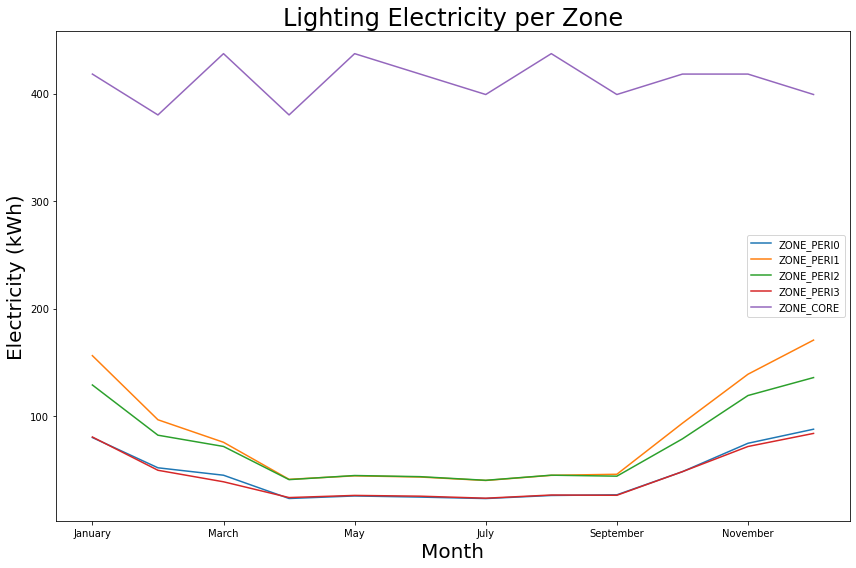

In [91]:
ZoneLighting.plot(figsize=(12,8))

plt.title("Lighting Electricity per Zone",fontsize = 24)
plt.xlabel('Month', fontsize = 20)
plt.ylabel("Electricity (kWh)",fontsize = 20)

plt.tight_layout()
plt.show()

In [92]:
## Define your customized plot function
def VisBarPlotByAX(ax, xData, width=0.5, offset=0, color = "purple", title = 'title', YLable="YLable" , path="", axLine1 = 0, axLine2 = 0,label='Heating' ):
    if(offset !=0):
        yTime = [i+offset for i in range(0,len(xData))]     
    else:
        yTime = [i for i in range(0,len(xData))]

    ax.bar(Result["Date/Time"],xData,width=width, alpha=0.5, color=color,label=label)
    ax.set_title(title,fontsize = 24)
    ax.set_xlabel('Month',fontsize = 20)
    ax.set_ylabel(YLable,fontsize = 20)
    ax.legend(loc='best')
    if(axLine1 != 0 and axLine2 != 0 ):
        ax.set_axhline(axLine1, color='r', label=r'True $\beta_1$')
        ax.set_axhline(axLine2, color='r', label=r'True $\beta_1$')
        ax.set_axhspan(axLine1, axLine2, facecolor='0.5', alpha=0.5,label=r'True $\beta_1$')

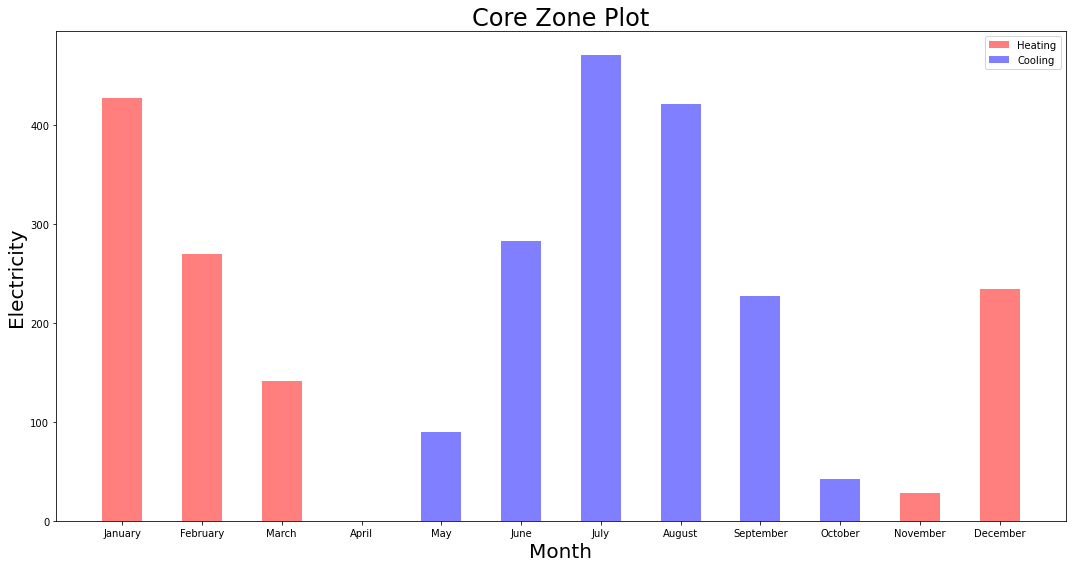

In [93]:
## Visuzlization
# 'ZONE_CORE IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly)',
#        'ZONE_CORE IDEAL LOADS AIR:Zone Ideal Loads Zone Total Cooling Energy [J](Monthly) '

## Set two variables to visualize 
bar1 = Result['ZONE_CORE IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly)']/3600000
bar2 = Result['ZONE_CORE IDEAL LOADS AIR:Zone Ideal Loads Zone Total Cooling Energy [J](Monthly) ']/3600000

ind=Result["Date/Time"]
width =0.2

path = "barChartPlot"
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

VisBarPlotByAX(ax, bar1, width = 0.5, color="red", YLable="Electricity",label='Heating', title = "Core Zone Plot")
VisBarPlotByAX(ax, bar2, width=0.5,offset=0.2, color="blue", YLable="Electricity",label='Cooling', title = "Core Zone Plot")


plt.savefig(path)
plt.tight_layout()
plt.show()

# Read multiple files

In [94]:
from os import walk
import numpy as np

mypath = 'params'
f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break
    
print (f)
f = f[1:]
print (f)

['0.1.txt', '0.2.txt', '0.3.txt', '0.4.txt', '0.5.txt', '0.6.txt', '0.7.txt', '0.8.txt', '0.9.txt', '1.txt']
['0.2.txt', '0.3.txt', '0.4.txt', '0.5.txt', '0.6.txt', '0.7.txt', '0.8.txt', '0.9.txt', '1.txt']


In [95]:
dfs = []
for i in f:
    fn = mypath + '/' + i
    dfs.append(pd.read_csv(fn, header = None))

In [96]:
dfs

[            0          1  2             3
 0   54.031211   7.914282  3  4.917335e+07
 1   55.031211   7.914282  3  6.827686e+07
 2   56.031211   7.914282  3  9.948423e+07
 3   57.031211   7.914282  3  1.197945e+08
 4   58.031211   7.914282  3  1.539450e+08
 5   59.031211   7.914282  3  1.534459e+08
 6   54.031211   8.914282  3  1.668642e+08
 7   55.031211   8.914282  3  1.474622e+08
 8   56.031211   8.914282  3  1.129912e+08
 9   57.031211   8.914282  3  8.177466e+07
 10  58.031211   8.914282  3  5.303123e+07
 11  59.031211   8.914282  3  4.204529e+07
 12  54.031211   9.914282  3  4.917335e+07
 13  55.031211   9.914282  3  6.827686e+07
 14  56.031211   9.914282  3  9.948423e+07
 15  57.031211   9.914282  3  1.197945e+08
 16  58.031211   9.914282  3  1.539450e+08
 17  59.031211   9.914282  3  1.534459e+08
 18  54.031211  10.914282  3  1.668642e+08
 19  55.031211  10.914282  3  1.474622e+08
 20  56.031211  10.914282  3  1.129912e+08
 21  57.031211  10.914282  3  8.177466e+07
 22  58.031

In [97]:
dfs[0]

,0,1,2,3
0,54.031211,7.914282,3,4.917335e+07
1,55.031211,7.914282,3,6.827686e+07
2,56.031211,7.914282,3,9.948423e+07
3,57.031211,7.914282,3,1.197945e+08
4,58.031211,7.914282,3,1.539450e+08
5,59.031211,7.914282,3,1.534459e+08
6,54.031211,8.914282,3,1.668642e+08
7,55.031211,8.914282,3,1.474622e+08
8,56.031211,8.914282,3,1.129912e+08
9,57.031211,8.914282,3,8.177466e+07
